# DS 211 Numerical Optimization (Assignment 0)

1a.

The derivative is $(-12*x)/(6*x^2-1)^2$

1b.

In [239]:
import math
x= 0.408
ans1 = round((-12*x),3)/round(pow((round(6*x*x,3)-1),2),3)
print("Derivative value after 3-digit arithmatic with rounding is:",round(ans1,3))


ZeroDivisionError: float division by zero

In [240]:
import math
x= 0.408
ans2 = round((-12*x),4)/round(pow((round(6*x*x,4)-1),2),4)
print("Derivative value after 4-digit arithmatic with rounding is:",round(ans2,4))

ZeroDivisionError: float division by zero

I have considered 3 digits and 4 digits after decimals and rounding in each step for the calculations respectively. 

With both 3-digit and 4-digit arithmetic rounding, the result is becoming undefined as the denominator is becoming zero.

1c.

In [241]:
#Horner's Method 

import math
def Horner(poly,deg,x):
    ans = round(poly[0],3)
    for i in range(1,deg):
        ans = round(round((ans*x),3)+round(poly[i],3),3)
    return ans
    
    
poly = [1 , -7 , 8 , -0.35]
x  = 1.37
deg = len(poly)

print("Value of the polynomail is:" , round(Horner(poly,deg,x),3))


Value of the polynomail is: 0.043


1d.

In [242]:
import math
x=1.37
ans1 = round(round((x*x),3)*x,3)-round(round((7*x),3)*x,3)+round(8*x,3)-0.35
print("Polynomial value value after 3-digit arithmatic with rounding is:",round(ans1,3))
ans2 = round(round((x*x),4)*x,4)-round(round((7*x),4)*x,4)+round(8*x,3)-0.35
print("Polynomial value after 4-digit arithmatic with rounding is:",round(ans2,4))


Polynomial value value after 3-digit arithmatic with rounding is: 0.043
Polynomial value after 4-digit arithmatic with rounding is: 0.0431


1e.

Horner's method is giving same results as 3-digit arithmatic and rounding but 4-digit arithmetic and rounding is more precise than Horner's method.

2a.

In [243]:
#RAM requirements
arr_size  = 360*180*100*1000
prec_bytes = 64/8
print("RAM necessary :",arr_size*prec_bytes/(1024*1024),"megabytes.")
print("RAM necessary :",arr_size*prec_bytes/(1024*1024*1024),"gigabytes.")

RAM necessary : 49438.4765625 megabytes.
RAM necessary : 48.279762268066406 gigabytes.


2b.

As the RAM size is 32G and the array storage requirement is around 48G , it is possible to use "swap space" feature that can be configured by the user and store the extra 12G data into disk.The part of the data that is accessed less frequently for the computations can be stored into disk as virtual RAM using this feature.

2c.

In [244]:
#As each degree is roughly 111 km and now resolution required is 1 km for both latitude and longitude so 
arr_size_new = 360*180*100*1000*111*111
prec_bytes = 64/8
print("RAM necessary :",arr_size_new*prec_bytes/(1024*1024),"megabytes.")
print("RAM necessary :",arr_size_new*prec_bytes/(1024*1024*1024),"gigabytes.")
print("RAM necessary :",arr_size_new*prec_bytes/(1024*1024*1024*1024),"terabytes.")

RAM necessary : 609131469.7265625 megabytes.
RAM necessary : 594854.9509048462 gigabytes.
RAM necessary : 580.9130379930139 terabytes.


Now it not possible to use this workstaion as very small amount of the whole data can be stored in RAM and virtual RAM using "swap space" is not an option in this senario.

3a.

$ f(x) = x^TAx + b^Tx $

$df(x)/dx = (A+A^T)x + b$

The Hessian(G) is $ d^2f(x)/dx^2 = (A+A^T) $

In [245]:
import numpy as np
from numpy import linalg as LA
A =np.array([[1,2,0],[2,0,6],[3,3,4]])
G = A + A.transpose()
eig_val , eig_vec = LA.eig(G)
print("Eigen Values of hessian matrix  are:",eig_val)


Eigen Values of hessian matrix  are: [15.49883071  0.76254115 -6.26137186]


It is nether maximum nor minimum as the matrix is not symmetric as eigen value is negative and rest two are positive.

3b.

Algorithm for Gaussian Elimination

1. Forward Substitution to convert the given matrix into a row-echelon form using the below techniques
        a.Swapping two rows
        b.Multiplyling a row by a non-zero scalar
        c.Adding scalar multiple of one row to another
2. Backawrd Substitution to calculate the individual elements of vector x
    

3c.
    
    

Gaussian elimination approach

So , $ x = -(A+A^T)^{-1} b $

So as all the eigen values are non-zero, the matrix is invertible and hence unique solution exists.

Hence we can say that it is should be a saddle point as optima does not exist.

In [246]:
def Forward_Elimination(G):
    m,n = np.shape(G) 
    #print(m,"and",n)
    r = 0;
    #Convert in REF
    #print(G)
    while(r<m):                    
            #Zeros below Pivot element        
        for i in range(r+1,m):
            fact = G[i,r]/G[r,r]
            G[i,r] = 0
            for j in range(r+1,n):
                G[i,j] = G[i,j]-(G[r,j]*fact)                 
        r = r+1
        #print(G)
    return(G)


def Back_substitution(X):
    m,n = np.shape(X)
    A_Rref = X[:,0:n-1]
    #print(A_Rref)
    b_eq = X[:,n-1]
    #print(b_eq)
    n = n-1
    Res_x = np.zeros(n)
    for i in range(n-1,-1,-1):
        temp = 0
        for j in range(n-1,i,-1):
            temp = temp + (Res_x[j]*A_Rref[i,j])
        Res_x[i] = (b_eq[i] - temp)/A_Rref[i,i]
    #print("Directly using Inverse",np.matmul(inv(A_Rref),b_eq))
    return(Res_x) 
    
        

3d.

In [250]:
A =np.array([[1,2,0],[2,0,6],[3,3,4]])
A = A.astype('float64')
b = np.array([[1,2,3]])
b = b.astype('float64')
G = np.array( A + A.T)
G = G.astype('float64')
Aug_mat = np.concatenate((G,-b.T),axis =1)

REF = Forward_Elimination(Aug_mat)
print("Augmented Matrix is:",Aug_mat)
Result  = Back_substitution(RREF)
print("Final solution for x is:",Result)


Augmented Matrix is: [[ 2.     4.     3.    -1.   ]
 [ 0.    -8.     3.     0.   ]
 [ 0.     0.     4.625 -1.5  ]]
Final solution for x is: [ 0.0625  -0.09375 -0.25   ]


In [253]:
#Debug the results obtained
print(np.matmul(G,Result))

[-1.      -2.      -2.65625]


Trouble Faced:

The augumented matrix is coming as expected.But after back substitution the values of b are matching for two and not for the last one.
I checked forward substition step doing by hand and its matching.Also the values of x obtained by directly caluclating x using inverse of A and b is also matching.
But the values of b recalculated form A and x are not matching.

4a.

In [254]:
import numpy as np
from numpy import linalg as LA

def CGS(V):
    #In n dim space we can have maximum n independent vectors
    m,n = V.shape
    Q = np.zeros(V.shape)
    for j in range(0,n):
        temp_vect = V[:,j]
        for k in range(0,j):
            temp_vect = temp_vect - (np.dot(Q[:,k],V[:,j])*Q[:,k])
        Q[:,j] = temp_vect / LA.norm(temp_vect,2)
    return Q
        

In [255]:
def MGS(V):
    #In n dim space we can have maximum n independent vectors
    m,n = V.shape
    Q = np.zeros(V.shape)
    for j in range(0,n):
        Q[:,j] = V[:,j]/LA.norm(V[:,j],2)
        for k in range(j+1,n):
            V[:,k] = V[:,k]  - (np.dot(Q[:,j],V[:,k])*Q[:,j])
    return Q
        

4b.

In [256]:
def QR_fact(m):
    A = np.random.rand(m,m)
    B = np.random.rand(m,m)
    #print(A)
    #print(B)
    q1, r1 = np.linalg.qr(A)
    q2, r2 = np.linalg.qr(B)
    #Generate Diagonal Elements
    S = np.zeros((m,m))
    for x in range(1,m+1):
        S[x-1,x-1] = 1/pow(2,x)
    #print(S)
    #Generate V
    temp = np.matmul(q1,S)
    V = np.matmul(temp,q2)
    #print(V)
    Q_cgs_own = CGS(V) 
    Q_mgs_own = MGS(V) 
    #Q_inbuilt , r = np.linalg.qr(V)
    err_cgs = LA.norm((np.identity(m)-np.matmul(Q_cgs_own,Q_cgs_own.T)),2)
    err_mgs = LA.norm((np.identity(m)-np.matmul(Q_mgs_own,Q_mgs_own.T)),2)
    return([err_cgs,err_mgs])
    #print(Q_cgs_own)
    #print(Q_mgs_own)
    #print(Q_inbuilt)

4c.

In [257]:
#Vary the parameter m 
m = [5,10,50,100,150,200,250,500,750,1000]
e_cgs = np.zeros(10)
e_mgs = np.zeros(10)
count = 0
for x in (m):
    e_cgs[count],e_mgs[count] = QR_fact(x)
    count=count+1

4d.

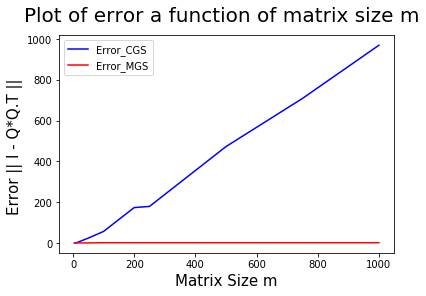

In [264]:
#Plot the data

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

plt.legend(['error_cgs', 'error_mgs'], loc='upper left')

plt.plot(m,e_cgs,'-b', label='Error_CGS')
plt.plot(m,e_mgs,'-r', label='Error_MGS')
plt.legend(loc='upper left')
plt.suptitle('Plot of error a function of matrix size m', fontsize=20)
plt.xlabel('Matrix Size m', fontsize=15)
plt.ylabel('Error || I - Q*Q.T || ', fontsize=15)

fig.savefig('Error_Plot.jpg',dpi=500,papertype ='a4')



4e.

With increase in Matrix Size, the error in Modified Gram Schmidt remained almost constant whereas the error for the Classical Gram Schmidt blown up . So Modified Gram Schmidt is better than the other althogh both involves equal amount of computations but Modified Gram Schmidt is numerically more stable as compared to Classical Gram Schmidt algorithm. 


The reason is in Classical Gram Schmidt the target vector is made orthogonal to all the already orthogonal vectors which involve sum of many vector dot products in a single step. But in Modified Gram Schmidt all the vectors are made orthogonal to the new vector generated in the same step so that vector dot products for each vector gets distributed over multiple steps and it helps in cancelling of rounf off errors in that way leading to flat results for Modified Gram Schmidt algorithm.


5

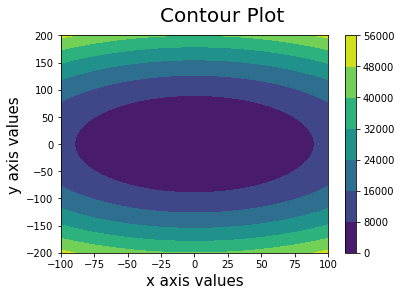

In [265]:
#Contour Map

import numpy as np
import matplotlib.pyplot as plt

#Generate Synthetic dataset

x_val = np.linspace(-100,100,100)
y_val = np.linspace(-200,200,100) 
X, Y = np.meshgrid(x_val, y_val)
Z = np.abs(X**2 + Y**2)
plt.figure()
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.suptitle('Contour Plot', fontsize=20)
plt.xlabel('x axis values', fontsize=15)
plt.ylabel('y axis values', fontsize=15)
plt.show()
